In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

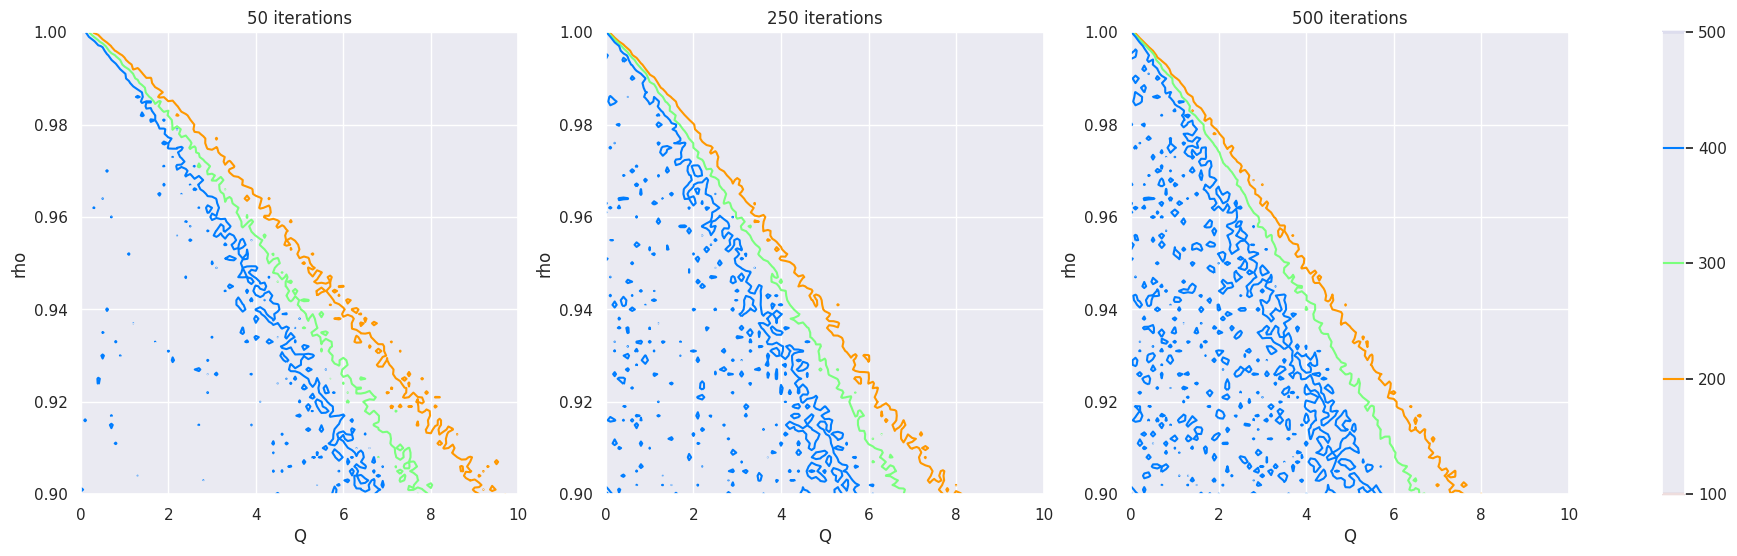

In [142]:
df = pd.read_csv('results/rho-Q-zoom.csv')
iters = [50, 250, 500]
fig, axs = plt.subplots(1, len(iters), figsize=(len(iters)*7+3, 6))
cmap = 'jet_r'
levels = 3
cs = None
for i in range(len(iters)):
    tmp = df[df['iteration']==iters[i]]
    matrix = tmp.pivot(index='rho', columns='Q', values='bestLength')
    X=matrix.columns.values
    Y=matrix.index.values
    Z=matrix.values
    axs[i].set_title(str(iters[i]) + ' iterations')
    axs[i].set_xlabel('Q')
    axs[i].set_ylabel('rho')
    if cs is None:
        cs = axs[i].contour(X,Y,Z,levels, cmap=cmap)
    else:
        axs[i].contour(X,Y,Z, cs.levels, cmap=cmap)
plt.colorbar(cs, ax=axs)
plt.show()

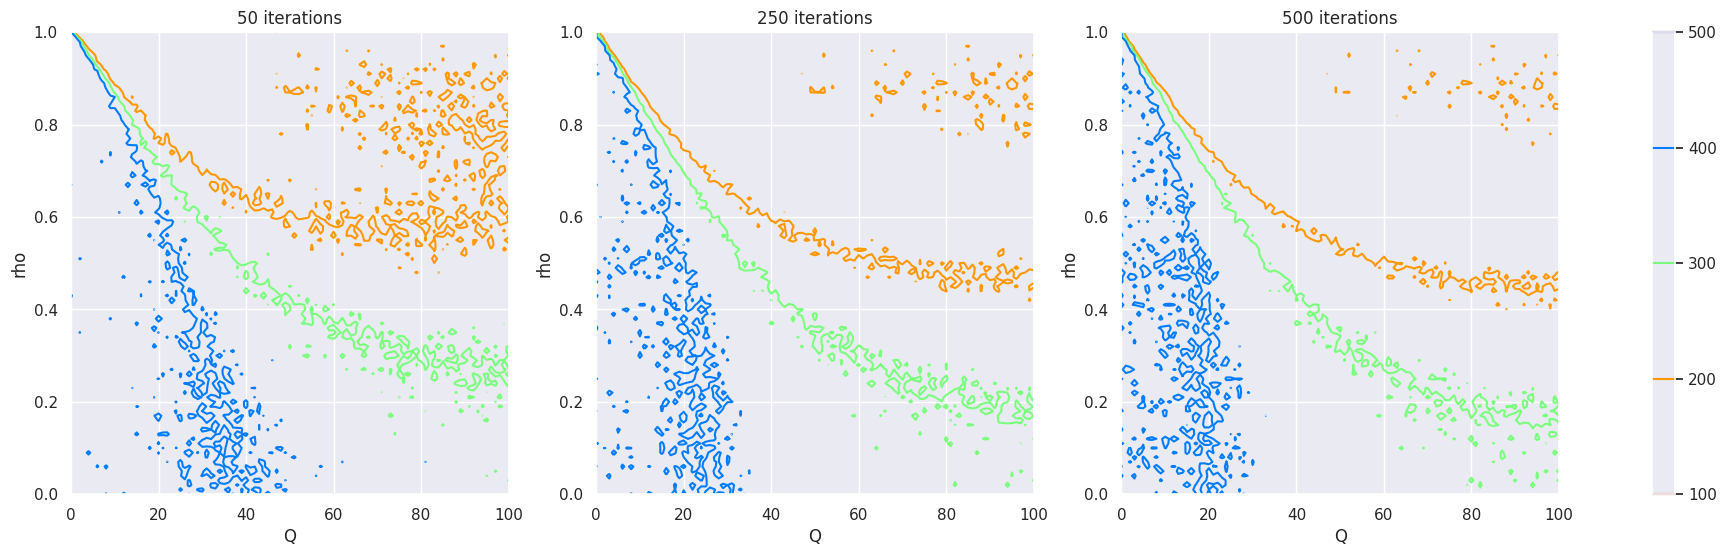

In [143]:
df = pd.read_csv('results/rho-Q.csv')
iters = [50, 250, 500]
fig, axs = plt.subplots(1, len(iters), figsize=(len(iters)*7+3, 6))
for i in range(len(iters)):
    tmp = df[df['iteration']==iters[i]]
    matrix = tmp.pivot(index='rho', columns='Q', values='bestLength')
    X=matrix.columns.values
    Y=matrix.index.values
    Z=matrix.values
    axs[i].set_title(str(iters[i]) + ' iterations')
    axs[i].set_xlabel('Q')
    axs[i].set_ylabel('rho')
    axs[i].contour(X,Y,Z, cs.levels, cmap=cmap)
plt.colorbar(cs, ax=axs)
plt.show()

In [39]:
t = df[(df['rho']>0.95) & (df['Q']>5)].

,iteration,alpha,beta,sigma,rho,Q,bestLength,bestCurrent,nBestPathAnts,nBestCurrentPathAnts
0,50,1.0,2.0,1.0,0.9755,7.55,156.662324,165.424166,0.0380,1.6200
1,250,1.0,2.0,1.0,0.9755,7.55,154.745946,165.426995,0.0096,2.0444
2,500,1.0,2.0,1.0,0.9755,7.55,154.109629,165.222009,0.0028,2.1504


In [111]:
df = pd.read_csv('results/output2.csv')
df['sigma'].unique()

array([ 3.,  0.,  1.,  6.,  7.,  4.,  5., 10., 11.,  8.,  9., 14., 15.,
       12., 13., 18., 19., 16., 17.])

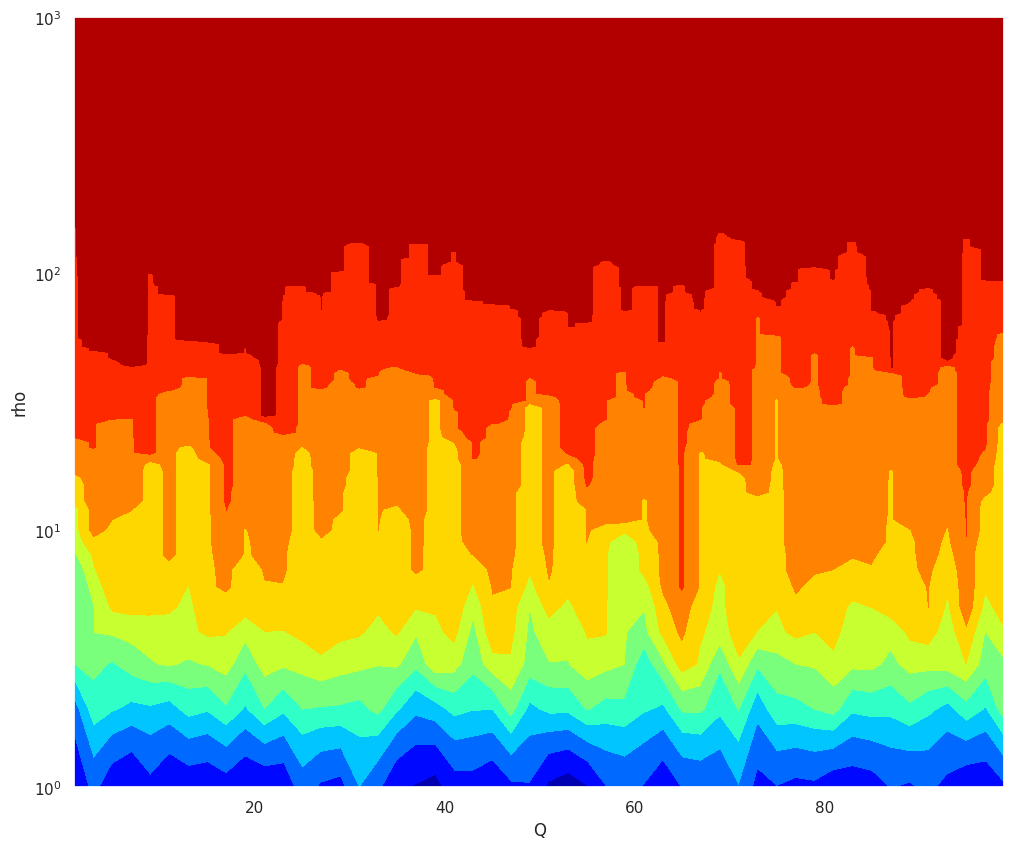

In [126]:
df = pd.read_csv('results/output-sigma2.csv')
df = df.groupby(['iteration','sigma']).mean().reset_index()
fig, axs = plt.subplots(1, 1, figsize=(12,10))
matrix = df.pivot(index='iteration', columns='sigma', values='bestLength')
X=matrix.columns.values
Y=matrix.index.values
Z=matrix.values
axs.set_xlabel('Q')
axs.set_ylabel('rho')
axs.contourf(X,Y,Z, 10, cmap=cmap)
axs.set_yscale('log')
plt.show()


<AxesSubplot: xlabel='iteration', ylabel='bestLength'>

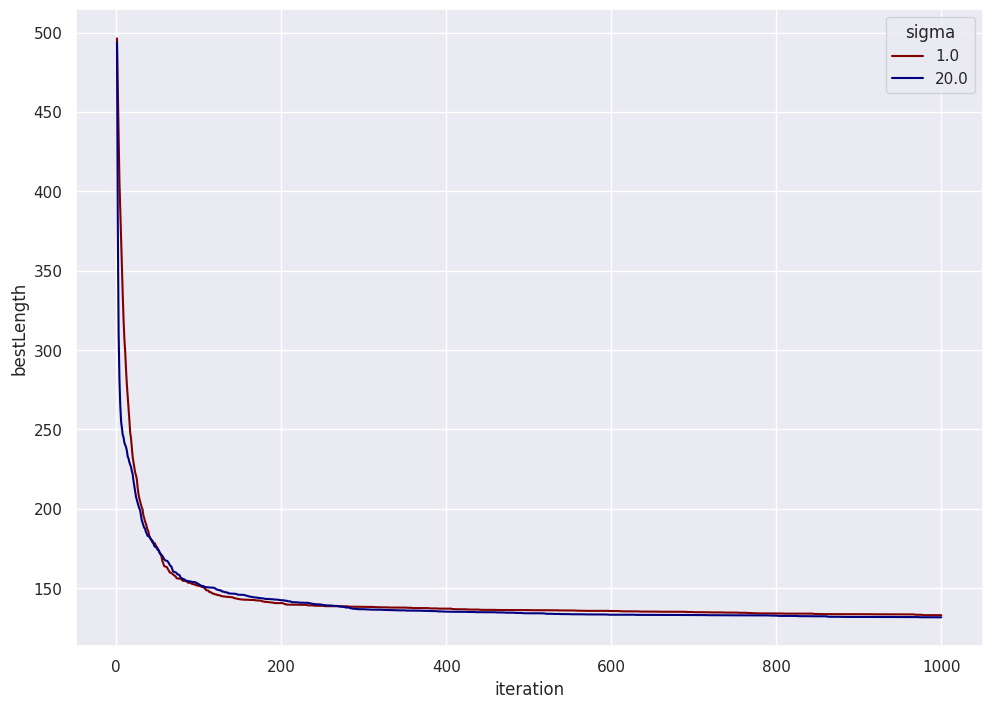

In [129]:
df = pd.read_csv('results/output.csv')
df = df.groupby(['iteration','sigma']).mean().reset_index()
sns.lineplot(data=df, x='iteration', y='bestLength', hue='sigma', palette='jet_r')


<AxesSubplot: xlabel='Q', ylabel='bestLength'>

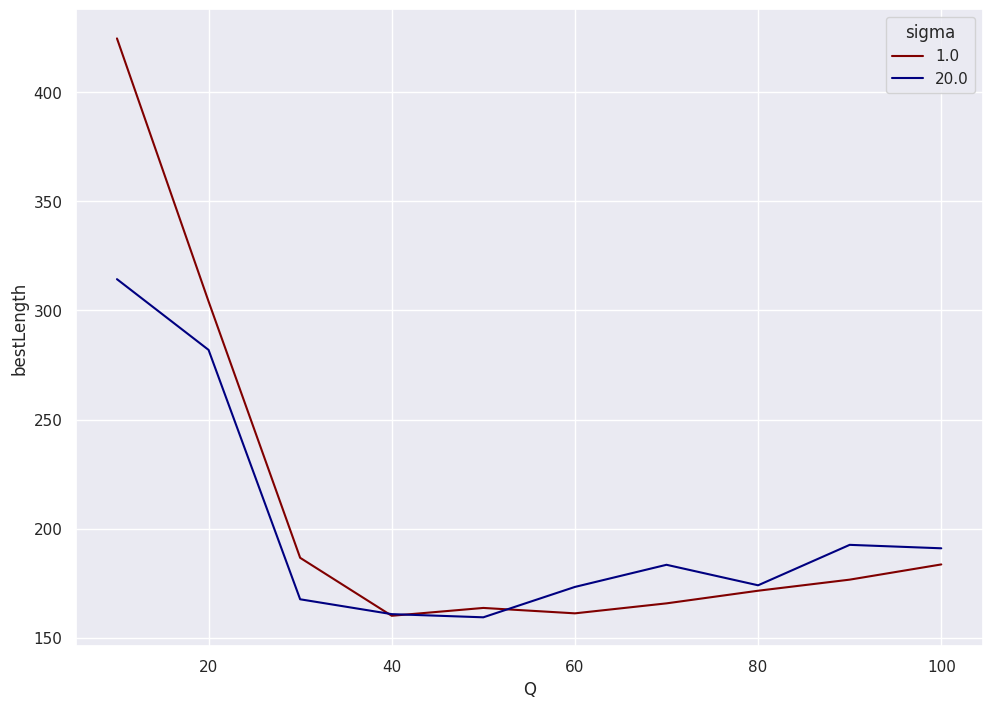

In [132]:
df = pd.read_csv('results/output.csv')
df = df[df['iteration']==100]
df = df.groupby(['Q','sigma']).mean().reset_index()
sns.lineplot(data=df, x='Q', y='bestLength', hue='sigma', palette='jet_r')

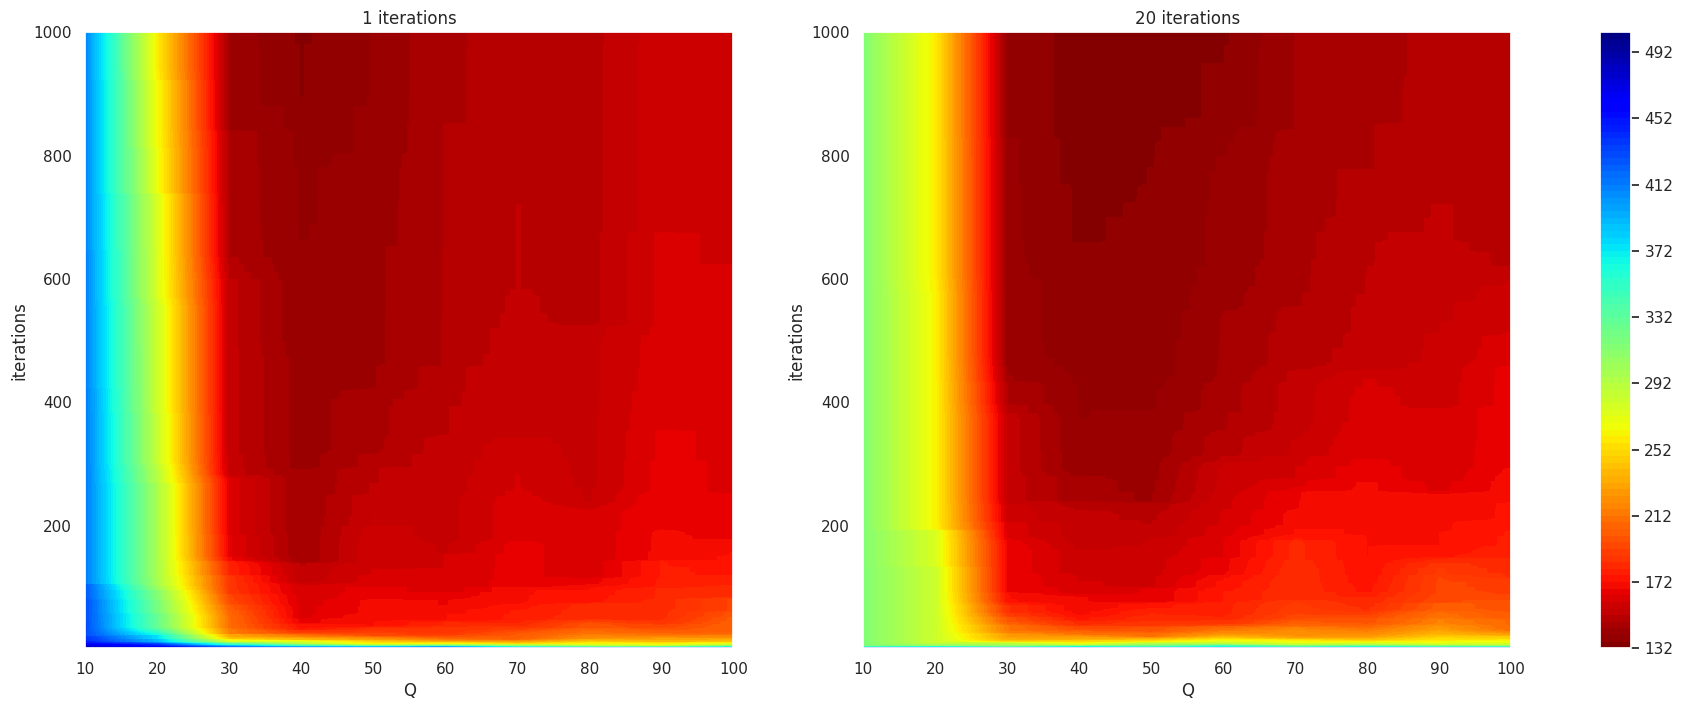

In [137]:
df = pd.read_csv('results/output.csv')
sigimas = [1,20]
fig, axs = plt.subplots(1, len(sigimas), figsize=(len(sigimas)*10+3, 8))
cmap = 'jet_r'
levels =  100
cs = None
for i in range(len(sigimas)):
    tmp = df[df['sigma']==sigimas[i]]
    tmp = tmp.groupby(['Q','iteration']).mean().reset_index()
    matrix = tmp.pivot(index='iteration', columns='Q', values='bestLength')
    X=matrix.columns.values
    Y=matrix.index.values
    Z=matrix.values
    axs[i].set_title(str(sigimas[i]) + ' iterations')
    axs[i].set_xlabel('Q')
    axs[i].set_ylabel('iterations')
    if cs is None:
        cs = axs[i].contourf(X,Y,Z,levels, cmap=cmap)
    else:
        axs[i].contourf(X,Y,Z, cs.levels, cmap=cmap)
plt.colorbar(cs, ax=axs)
plt.show()

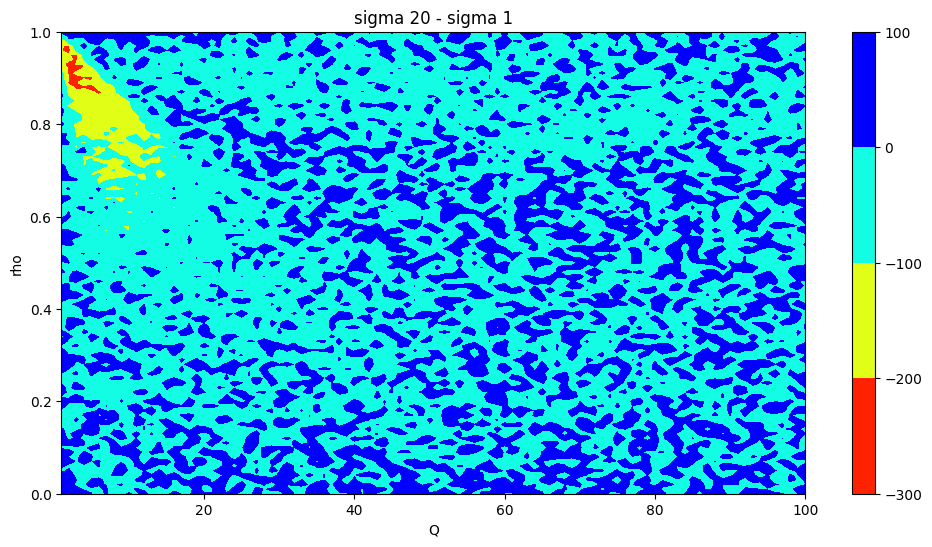

In [16]:
df = pd.read_csv('results/rho-Q-sigma.csv')
df = df[df['iteration']==500]
fig, axs = plt.subplots(1, 1, figsize=(12, 6))
cmap = 'jet_r'
levels = 3
cs = None


simga1 = df[df['sigma']==1]
simga20 = df[df['sigma']==20]

m1 = simga1.pivot(index='rho', columns='Q', values='bestLength')
m20 = simga20.pivot(index='rho', columns='Q', values='bestLength')

X=m1.columns.values
Y=m1.index.values
Z=m20.values - m1.values
axs.set_title('sigma 20 - sigma 1')
axs.set_xlabel('Q')
axs.set_ylabel('rho')
cs = axs.contourf(X,Y,Z,levels, cmap=cmap)
plt.colorbar(cs, ax=axs)
plt.show()

In [6]:
pd.read_csv('results/rho-Q-sigma.csv')

,iteration,alpha,beta,sigma,rho,Q,bestLength,bestCurrent,nBestPathAnts,nBestCurrentPathAnts
0,10,1.0,2.0,1.0,0.00,1.0,481.836513,533.674158,0,1
1,10,1.0,2.0,20.0,0.00,1.0,449.275737,495.990074,0,1
2,10,1.0,2.0,1.0,0.01,1.0,458.528365,458.528365,1,1
3,10,1.0,2.0,20.0,0.01,1.0,470.953226,490.931667,0,1
4,10,1.0,2.0,1.0,0.02,1.0,463.533456,498.617980,0,1
...,...,...,...,...,...,...,...,...,...,...
80795,500,1.0,2.0,20.0,0.98,100.0,168.308070,170.907243,0,1
80796,500,1.0,2.0,1.0,0.99,100.0,188.488968,206.500483,0,1
80797,500,1.0,2.0,20.0,0.99,100.0,168.123531,179.030117,0,1
80798,500,1.0,2.0,1.0,1.00,100.0,177.672691,180.399974,0,1


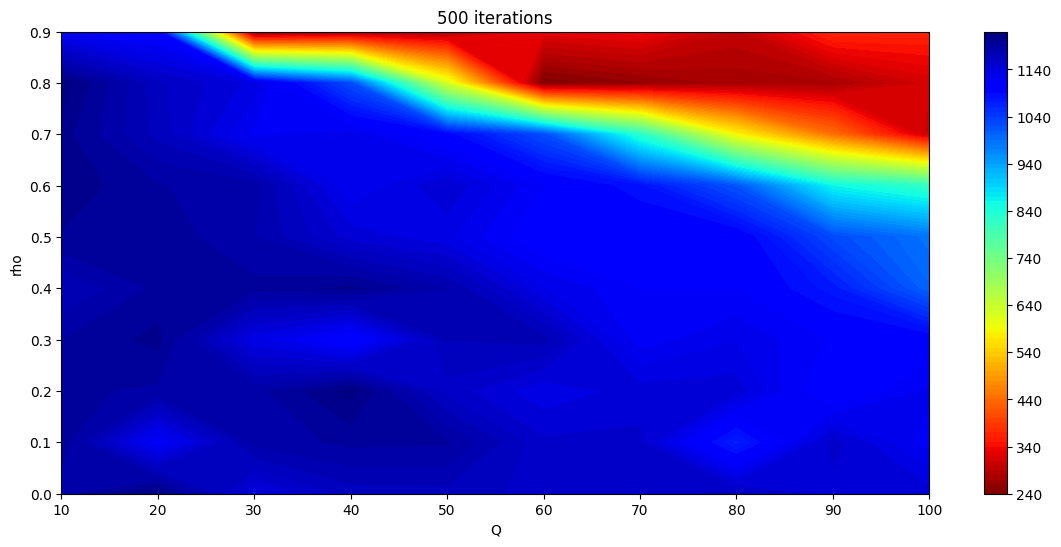

In [10]:
df = pd.read_csv('results/att48-double.csv')
fig, axs = plt.subplots(1, 1, figsize=(14, 6))
tmp = df[df['iteration']==500]
matrix = tmp.pivot(index='rho', columns='Q', values='bestLength')
X=matrix.columns.values
Y=matrix.index.values
Z=matrix.values
axs.set_title(str(500) + ' iterations')
axs.set_xlabel('Q')
axs.set_ylabel('rho')
cs = axs.contourf(X,Y,Z, 100, cmap='jet_r')
plt.colorbar(cs, ax=axs)
plt.show()

In [ ]:
df = pd.read_csv('results/att48-half.csv')
fig, axs = plt.subplots(1, 1, figsize=(14, 6))
tmp = df[df['iteration']==500]
matrix = tmp.pivot(index='rho', columns='Q', values='bestLength')
X=matrix.columns.values
Y=matrix.index.values
Z=matrix.values
axs.set_title(str(500) + ' iterations')
axs.set_xlabel('Q')
axs.set_ylabel('rho')
cs = axs.contourf(X,Y,Z, 100, cmap='jet_r')
plt.colorbar(cs, ax=axs)
plt.show()